In [5]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import cv2
from  matplotlib.colors import LinearSegmentedColormap
from scipy.signal import butter, lfilter, iirnotch, filtfilt, resample, find_peaks
from scipy.io import savemat
from src.xray import *
from src.tdt_support import *
from src.filters import *
from src.neural_analysis import *
from src.cort_processing import *
from src.wiener_filter import *

In [37]:
import pickle

In [7]:
tdt1 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/tdt/t0-030322-15-220303-161731'
kin1 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/angles/_t0-030322-15_2022-03-03_200f-11e100g1.csv'
toe1 = '/home/diya/Documents/rat-fes/data/DLC_anipose_models/anipose/anipose_t_march/session/pose-3d/_t0-030322-15_2022-03-03_200f-11e100g1.csv'
np_ts1 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/vids/TIMESTAMPS_cam1_t0-030322-15_2022-03-03_200f-11e100g1.npy'
crop1 = (5,180)

tdt2 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/tdt/t0-030322-15-2-220303-162513'
kin2 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/angles/_t0-030322-15-2_2022-03-03_200f-11e100g1.csv'
toe2 = '/home/diya/Documents/rat-fes/data/DLC_anipose_models/anipose/anipose_t_march/session/pose-3d/_t0-030322-15-2_2022-03-03_200f-11e100g1.csv'
np_ts2 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/vids/TIMESTAMPS_cam1_t0-030322-15-2_2022-03-03_200f-11e100g1.npy'
crop2 = (31,227)

tdt3 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/tdt/t0-030322-15-3-220303-163055'
kin3 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/angles/_t0-030322-15-3_2022-03-03_200f-11e100g1.csv'
toe3 = '/home/diya/Documents/rat-fes/data/DLC_anipose_models/anipose/anipose_t_march/session/pose-3d/_t0-030322-15-3_2022-03-03_200f-11e100g1.csv'
np_ts3 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/vids/TIMESTAMPS_cam1_t0-030322-15-3_2022-03-03_200f-11e100g1.npy'
crop3 = (5,200)

tdt4 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/tdt/t0-030322-15-4-220303-163556'
kin4 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/angles/_t0-030322-15-4_2022-03-03_200f-11e100g1.csv'
toe4 = '/home/diya/Documents/rat-fes/data/DLC_anipose_models/anipose/anipose_t_march/session/pose-3d/_t0-030322-15-4_2022-03-03_200f-11e100g1.csv'
np_ts4 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/vids/TIMESTAMPS_cam1_t0-030322-15-4_2022-03-03_200f-11e100g1.npy'
crop4 = (5,150)

In [8]:
rates1, angles1, ss1 = process_neural_kinangles(tdt1, kin1, np_ts1, 3.0, crop1, binsize=0.05, toe_height = toe1)
rates2, angles2, ss2 = process_neural_kinangles(tdt2, kin2, np_ts2, 3.0, crop2, binsize=0.05, toe_height = toe2)
rates3, angles3, ss3 = process_neural_kinangles(tdt3, kin3, np_ts3, 3.0, crop3, binsize=0.05, toe_height = toe3)
rates4, angles4, ss4 = process_neural_kinangles(tdt4, kin4, np_ts4, 3.0, crop4, binsize=0.05, toe_height = toe4)

#test_rates5, test_angles5 = process_neural_kinangles(tdt4, kin4, np_ts4, 3.0, test_crop, binsize=0.05)

rates_list = []
angles_list = []
ss_list = []

rates_list.extend((rates1, rates2, rates3, rates4))
angles_list.extend((angles1, angles2, angles3, angles4))
ss_list.extend((ss1, ss2, ss3, ss4))

read from t=0s to t=209.21s
read from t=0s to t=242.15s
read from t=0s to t=206.37s
read from t=0s to t=157.26s


In [24]:
toe_list = []
for thing in angles_list:
    toe_list.append(thing[7,:])

In [33]:
new_angles_list = []
for thing in angles_list:
    new_angles_list.append(thing[:7,:])

In [35]:
new_angles_list[0].shape

(7, 3503)

In [36]:
with open(f'/home/diya/Documents/rat-fes/data/pickles/rat-t_session.pkl', 'wb') as inp:
    pickle.dump([rates_list, new_angles_list, toe_list], inp)

NameError: name 'pickle' is not defined

In [33]:
proc_rates_list = []
proc_angles_list = []
proc_ss_list = []
for i in range(len(rates_list)):
    proc_rates, proc_angles, proc_ss = remove_bad_gaits(rates_list[i], angles_list[i], 115, ss=ss_list[i])
    proc_rates_list.append(proc_rates)
    proc_angles_list.append(proc_angles)
    proc_ss_list.append(proc_ss)

In [34]:
#rates, kins = stitch_data(rates_list, angles_list)
#ss = stitch_ss(ss_list)
proc_rates, proc_kins = stitch_data(proc_rates_list, proc_angles_list)
proc_ss = stitch_ss(proc_ss_list)

In [26]:
#h, vaf_array, test_x, test_y = decode_kfolds(rates, kins)
h, vaf_array, test_x, test_y = decode_kfolds(proc_rates, proc_kins)

In [42]:
np.average(vaf_array,1)

array([0.17130175, 0.53629173, 0.28624764, 0.53963543, 0.37514174,
       0.3530929 , 0.35496811, 0.44056997])

In [79]:
X = proc_kins[:,7]
Y = proc_kins[:,0:3]

h_fl, vaf_array_fl, test_x_fl, test_y_fl = decode_kfolds_forelimb(X, Y)

In [81]:
predic_y = test_wiener_filter(test_x_fl, h_fl)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
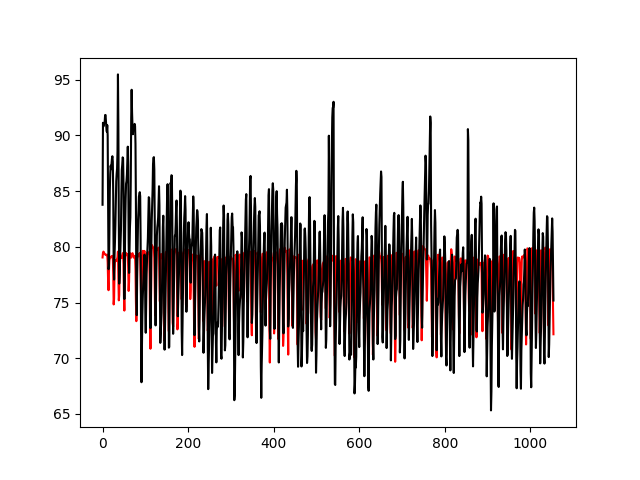

In [85]:
fig0=plt.figure()
ax0=fig0.add_subplot(111)
ax0.plot(predic_y[:,2],c='red')
ax0.plot(test_y_fl[:,2], c='black')

In [80]:
np.average(vaf_array_fl,1)

array([0.02334585, 0.00703015, 0.22455579])

In [57]:
np.average(vaf_array_fl,1)

array([0.02334585, 0.00703015, 0.22455579])

In [53]:
Y.shape

(10546, 3)

In [13]:
toe_predic = test_wiener_filter(test_x, h)

In [14]:
toe_predic = toe_predic[:,7]

0.4508013357383166


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
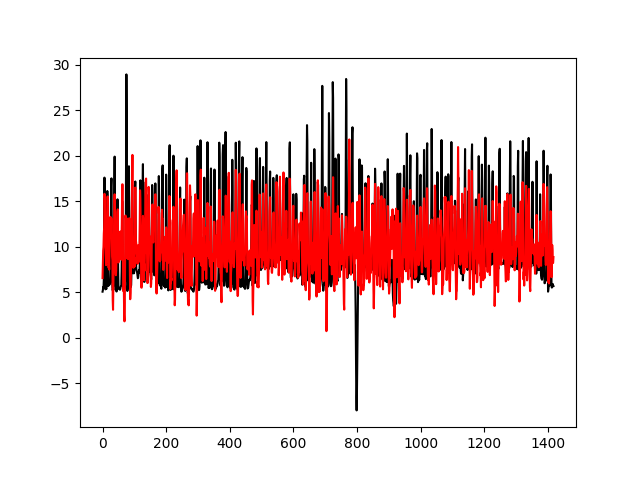

In [15]:
fig0 = plt.figure()
ax0 = fig0.add_subplot(111)
ax0.plot(test_y[:,7], c='black')
ax0.plot(toe_predic, c='red')

print(vaf(test_y[:,7], toe_predic))

In [28]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import metrics

X = proc_rates
Y = proc_ss
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=10000, tol=1e-3))
clf.fit(X,Y)
y_pred = clf.predict(X)
print("Accuracy:",metrics.accuracy_score(Y, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [10546, 3665910]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
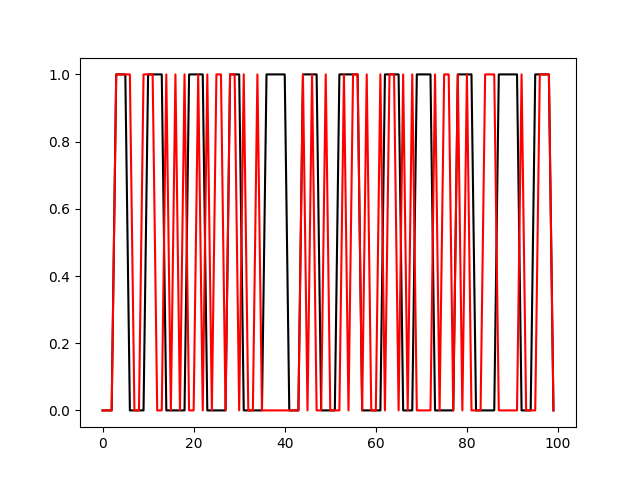

In [12]:
fig0 = plt.figure()
ax0 = fig0.add_subplot(111)
ax0.plot(Y[400:500], c='black')
ax0.plot(y_pred[400:500], c='red')